# Support Vector Classification & kNN with sklearn

Credits: https://github.com/ksopyla/svm_mnist_digit_classification

In [1]:
# standard imports
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
%matplotlib inline

# import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
# fetch original mnist dataset
from sklearn.datasets import fetch_openml
from matplotlib.colors import Normalize
import seaborn as sb


In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
def show_some_digits(images, targets, sample_size=24, title_text='Digit {}' ):
    '''
    Visualize random digits in a grid plot
    images - array of flatten gidigs [:,784]
    targets - final labels
    '''
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0],nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(nsamples/6.0), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))



In [36]:
def show_incorrect_digits(images,expected, predicted, title_text='Digit {}' ):
    # incorrect=[] print(len(incorrect)) incorrect.append(i)
    img = plt.figure(1, figsize=(150, 120), dpi=160)
    k=1
    for i in range(len(predicted)):
      if expected.iloc[i]!=predicted[i]:
        plt.subplot(np.ceil((len(predicted))/10.0), 10, k)
        k+=1
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(images[i].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(predicted[i]), fontsize=100)

In [5]:
# load data

# fetch mnist data
# mnist = fetch_mldata('MNIST original', data_home='./')

# mnist object contains: data, COL_NAMES, DESCR, target fields
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

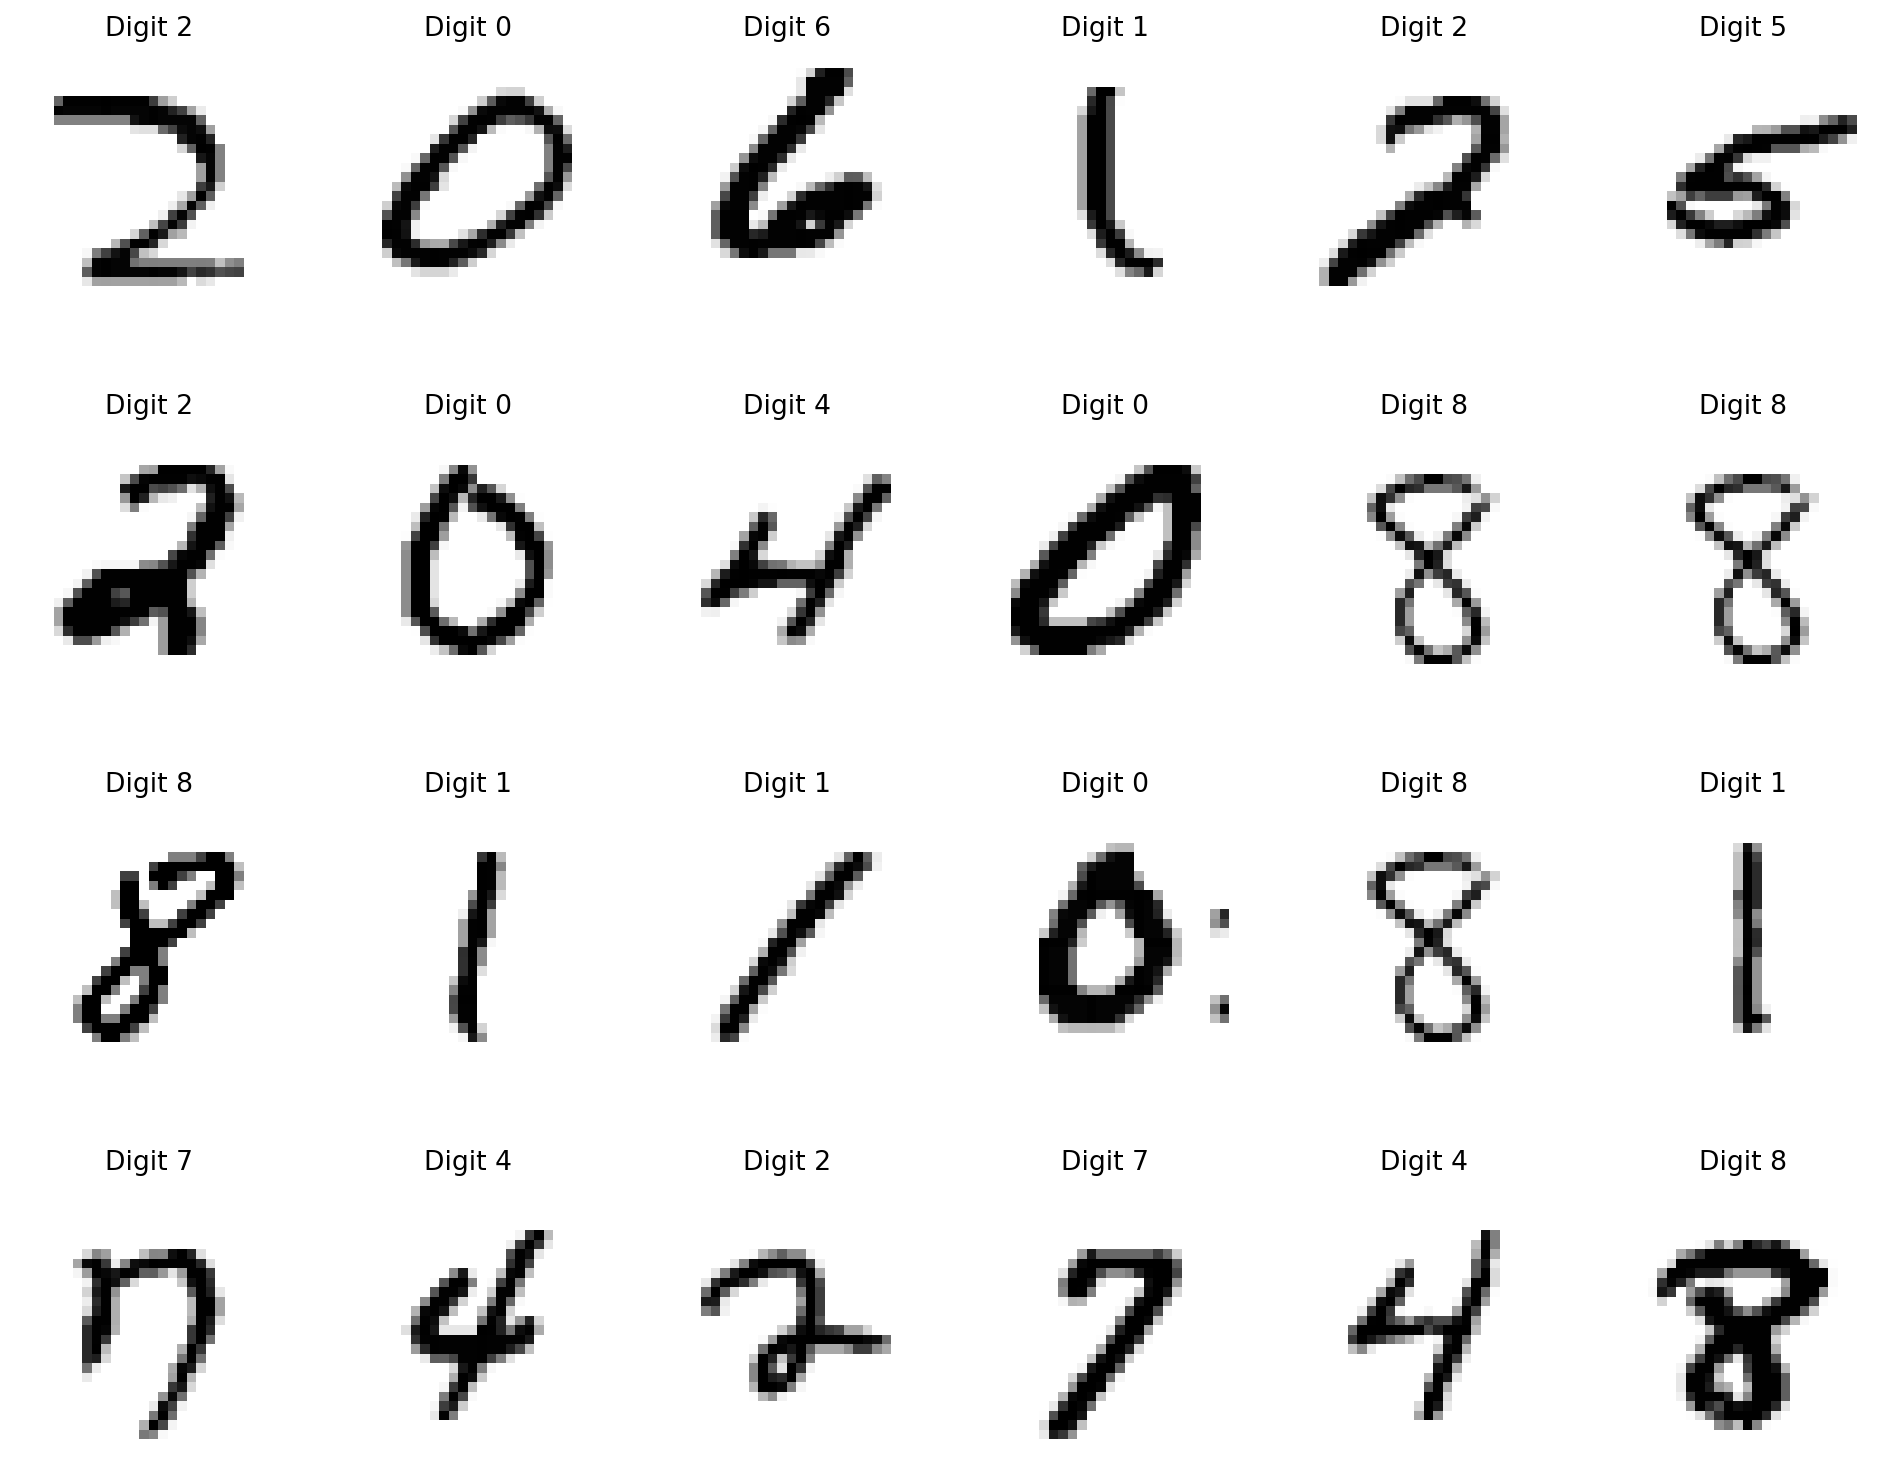

In [6]:
# split data into image and targets

# data field is 70k x 784 array, each row represents pixels from 28x28=784 image
images = mnist.data.values[:1000, :]
targets = mnist.target[:1000]

# Let's have a look at the random 16 images, 
# We have to reshape each data row, from flat array of 784 int to 28x28 2D array

#pick  random indexes from 0 to size of our dataset
show_some_digits(images, targets)

In [7]:
#full dataset classification
# normalise x values
X_data = images/255.0
# set y as the targets
Y = targets

#split data to train and test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)

In [8]:
np.shape(X_data)

(1000, 784)

In [9]:
def plot_confusion_matrix(cm):
  plt.subplots(figsize=(10, 6))
  sb.heatmap(cm, annot = True, fmt = 'g')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

param_gamma=0.05
Accuracy=0.8933333333333333


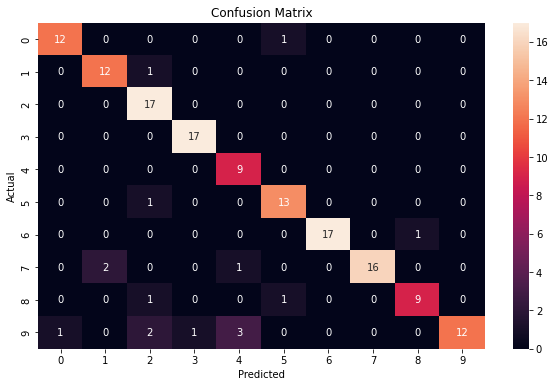

param_gamma=0.75
Accuracy=0.09333333333333334


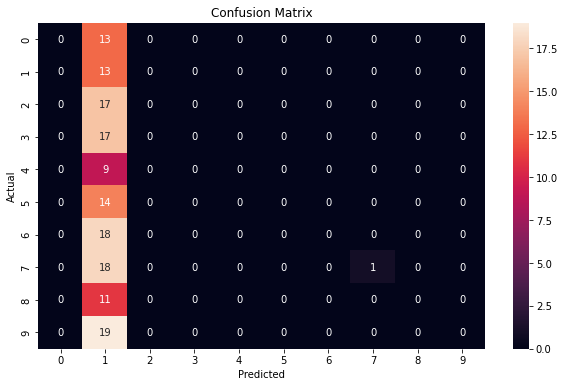

param_gamma=0.01
Accuracy=0.8933333333333333


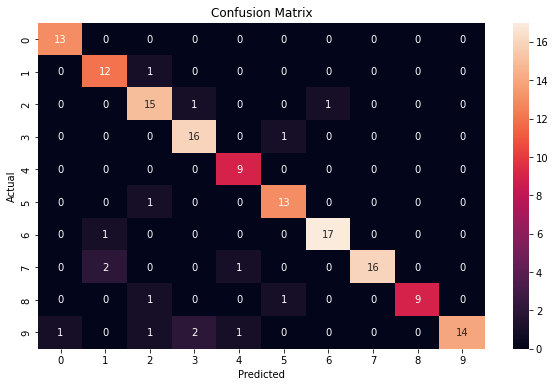

In [39]:
# try with others param_gamma
expected = y_test

param_C = 100
params_gamma=[0.05,0.75,0.01]
max_accuracy=0
p_g_max_accuracy=0
for i in range(3):
  param_gamma = params_gamma[i]
  print("param_gamma={}".format(param_gamma))
  # create clasifier according to params
  classifier = svm.SVC(C=param_C,gamma=param_gamma)
  classifier.fit(X_train, y_train)
  predicted = classifier.predict(X_test)
  
  accuracy=metrics.accuracy_score(expected, predicted)
  print("Accuracy={}".format(accuracy))
  if accuracy>max_accuracy:
    max_accuracy=accuracy
    p_g_max_accuracy=params_gamma[i]

  cm = metrics.confusion_matrix(expected, predicted)
  plot_confusion_matrix(cm)

In [40]:
# create a support vector classifier, and train it

# set params to pre-determined optimal values
param_C = 100
param_gamma = p_g_max_accuracy
print("param_gamma={}".format(param_gamma))

# create clasifier according to params
classifier = svm.SVC(C=param_C,gamma=param_gamma)

# we learn the digits on train part
# start timing
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

# train our SVM
classifier.fit(X_train, y_train)

# stop timing, print elapsed
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

param_gamma=0.05
Start learning at 2022-06-10 01:23:25.654575
Stop learning 2022-06-10 01:23:25.994053
Elapsed learning 0:00:00.339478


Accuracy=0.8933333333333333
Classification report for classifier SVC(C=100, gamma=0.05):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.86      0.92      0.89        13
           2       0.77      1.00      0.87        17
           3       0.94      1.00      0.97        17
           4       0.69      1.00      0.82         9
           5       0.87      0.93      0.90        14
           6       1.00      0.94      0.97        18
           7       1.00      0.84      0.91        19
           8       0.90      0.82      0.86        11
           9       1.00      0.63      0.77        19

    accuracy                           0.89       150
   macro avg       0.90      0.90      0.89       150
weighted avg       0.91      0.89      0.89       150




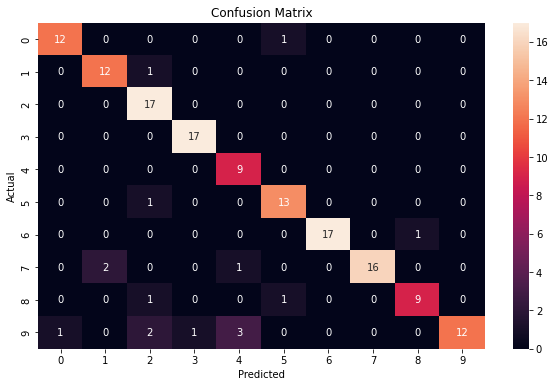

In [41]:
# now predict the value of the test

# predicted y values based on x values using SVM model
predicted = classifier.predict(X_test)

# show a few digits and the predictions
# show_some_digits(X_test,predicted,title_text="Predicted {}")

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

# print metrics
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
      
cm = metrics.confusion_matrix(expected, predicted)
#print("Confusion matrix:\n%s" % cm)

plot_confusion_matrix(cm)



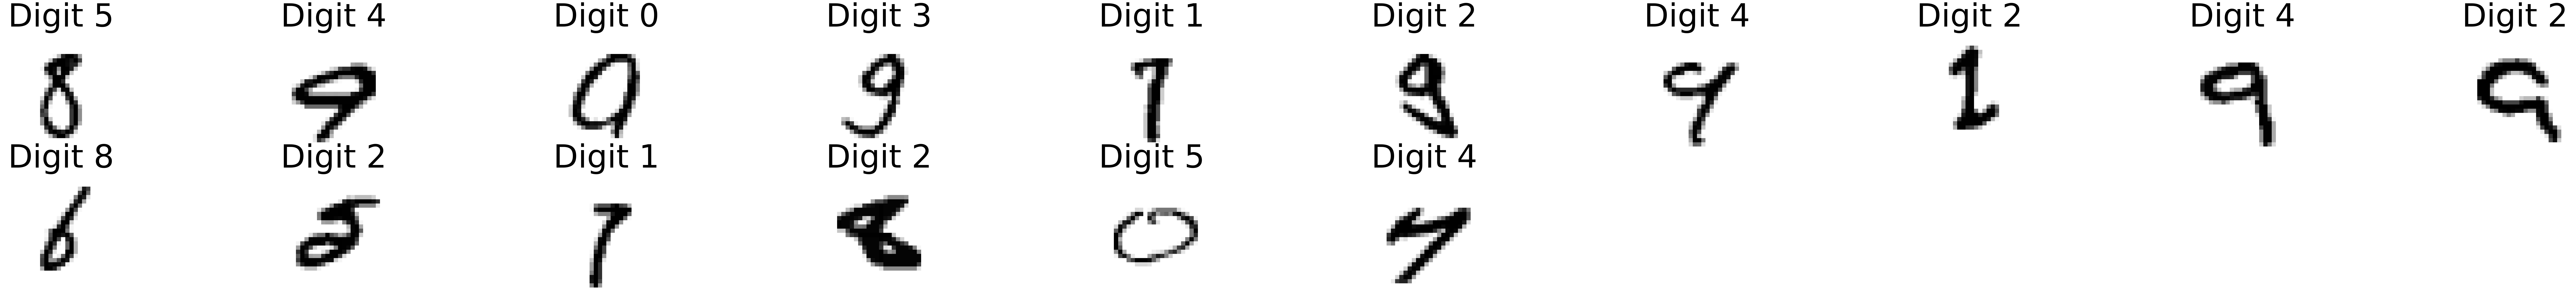

In [42]:
show_incorrect_digits(X_test,expected,predicted)

KNN

Accuracy=0.8333333333333334



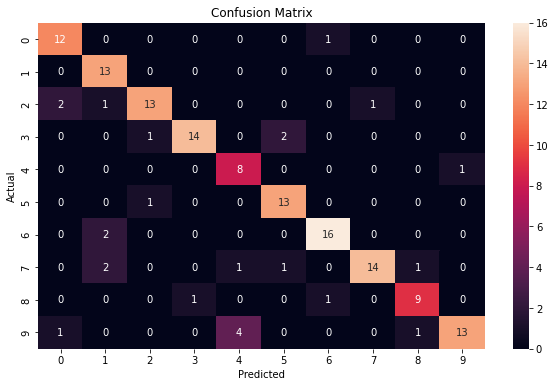

Accuracy=0.8466666666666667



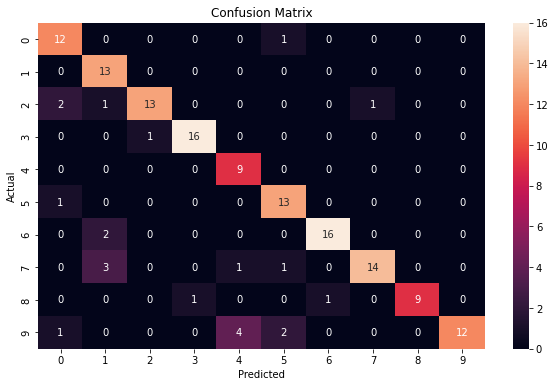

Accuracy=0.8666666666666667



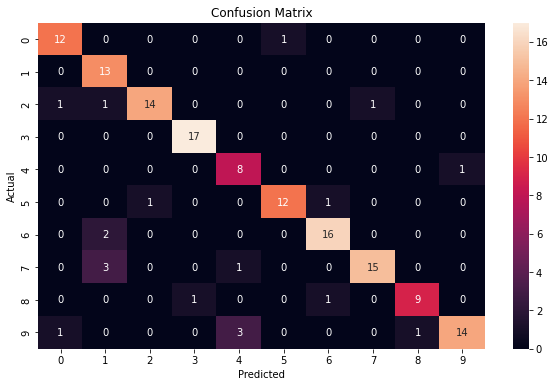

Accuracy=0.88



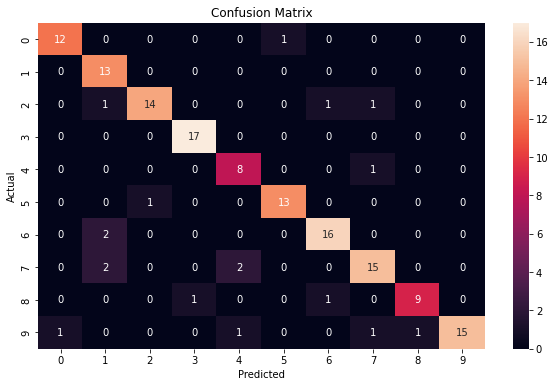

Accuracy=0.8733333333333333



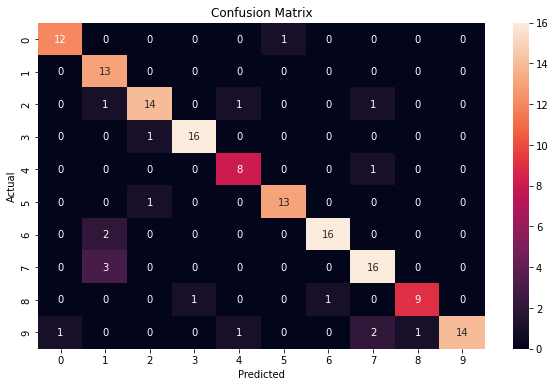

Accuracy=0.86



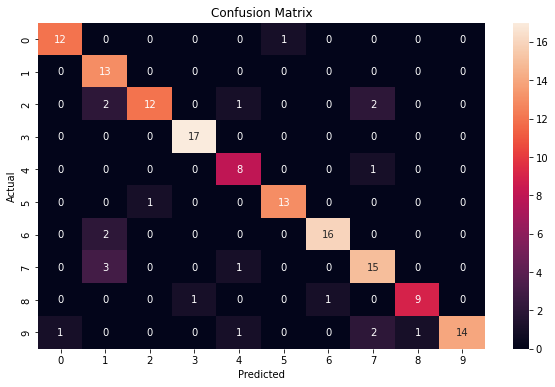

Accuracy=0.8733333333333333



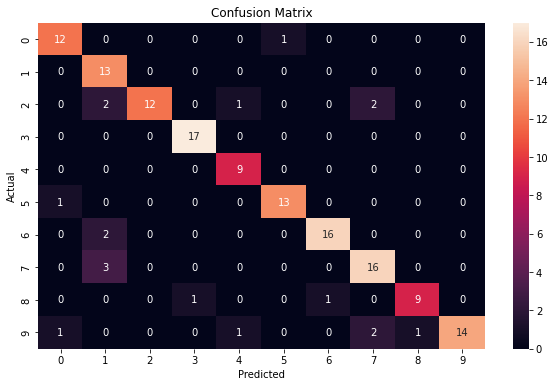

Accuracy=0.8666666666666667



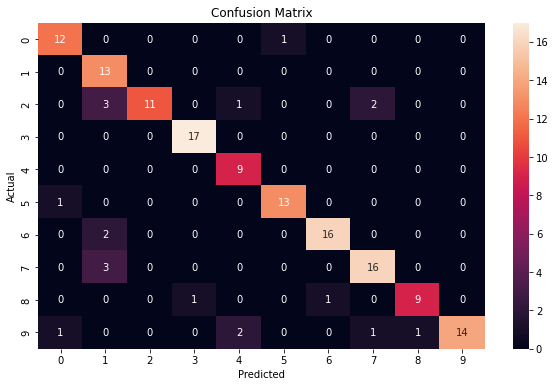

Accuracy=0.86



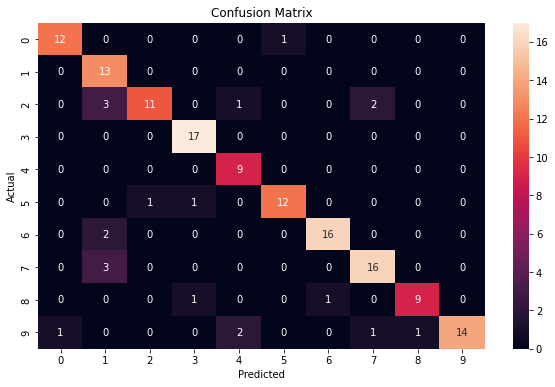

Accuracy=0.84



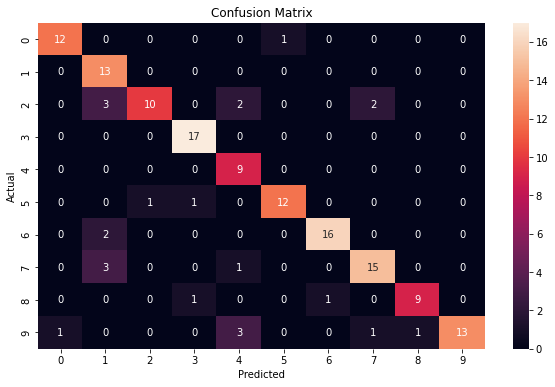

In [43]:
Accuracies=[]
for i in range(1,11):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)

  predicted = neigh.predict(X_test)

  Accuracy=metrics.accuracy_score(expected, predicted)
  Accuracies.append(Accuracy)
  print("Accuracy={}\n".format(Accuracy))

  cm = metrics.confusion_matrix(expected, predicted)

  plot_confusion_matrix(cm)

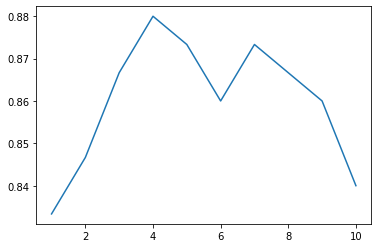

In [44]:
plt.plot(np.arange(1,11),Accuracies)

Start learning at 2022-06-10 01:25:00.555224
Stop learning 2022-06-10 01:25:00.559894
Elapsed learning 0:00:00.004670
Classification report for classifier SVC(C=100, gamma=0.05):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.72      1.00      0.84        13
           2       0.93      0.82      0.87        17
           3       0.94      1.00      0.97        17
           4       0.73      0.89      0.80         9
           5       0.93      0.93      0.93        14
           6       0.89      0.89      0.89        18
           7       0.83      0.79      0.81        19
           8       0.90      0.82      0.86        11
           9       1.00      0.79      0.88        19

    accuracy                           0.88       150
   macro avg       0.88      0.89      0.88       150
weighted avg       0.89      0.88      0.88       150


Accuracy=0.88

Confusion matrix:
[[12  0  0  0  0  1  0  0  0

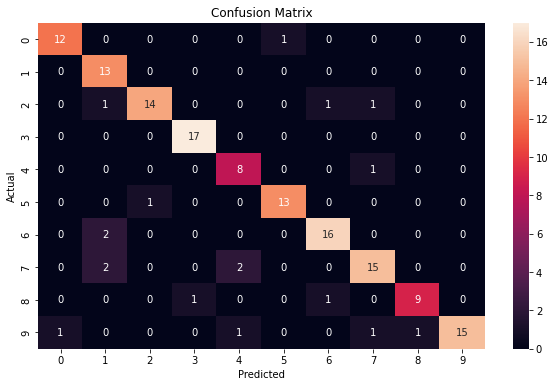

In [45]:
neigh = KNeighborsClassifier(n_neighbors=4)

start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

neigh.fit(X_train, y_train)

end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

predicted = neigh.predict(X_test)
# print metrics
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))


print("Accuracy={}\n".format(metrics.accuracy_score(expected, predicted)))

cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

plot_confusion_matrix(cm)





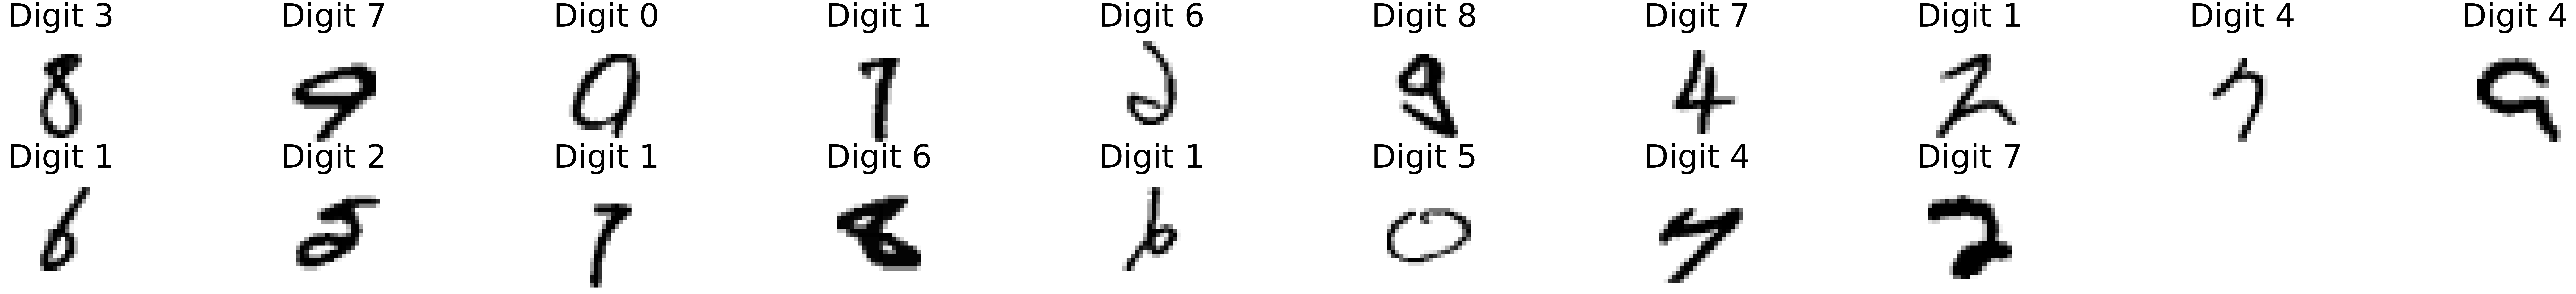

In [46]:
show_incorrect_digits(X_test,expected,predicted)